In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# FIFA 2019 Data Set 

In [2]:
#we read the file "players_19.csv" as a pandas dataframe
fifa19 = pd.read_csv(r'/content/drive/MyDrive/players_19.csv')
fifa19.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/players_19.csv'

# Encoder and Decoder for Player Postion

In [ ]:
#we encode encode and decode for the Player position by using dictionaries
decode = {0: 'CAM', 1: 'CB', 2: 'CDM', 3: 'CF', 4: 'CM', 5: 'GK', 6: 'LB',7: 'LM', 8: 'LW', 9: 'LWB', 10:'RB',
          11: 'RM', 12: 'RW',13: 'RWB', 14: 'ST'}

encode = dict(zip(decode.values(),decode.keys()))

# EDA

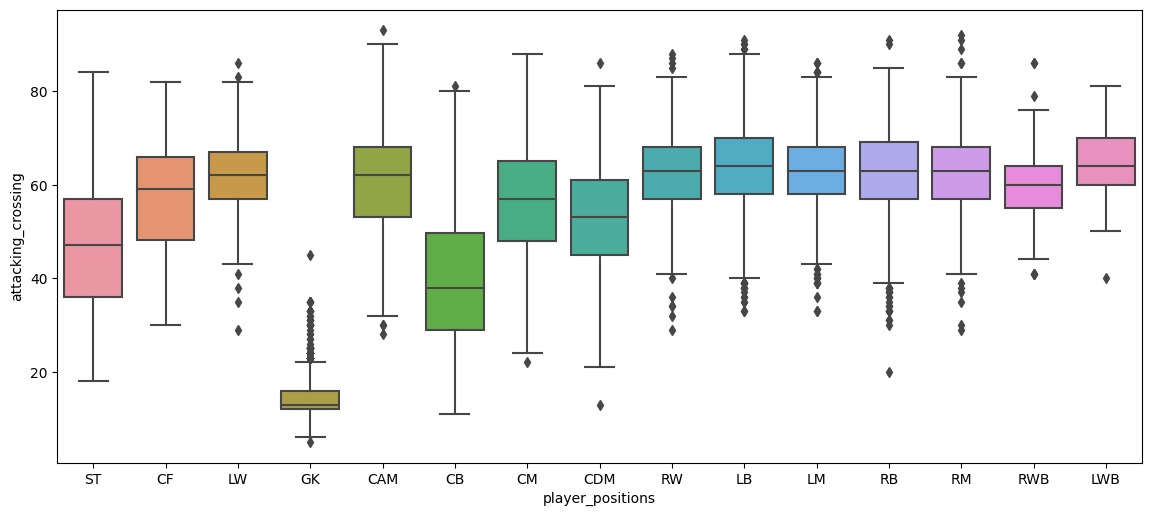

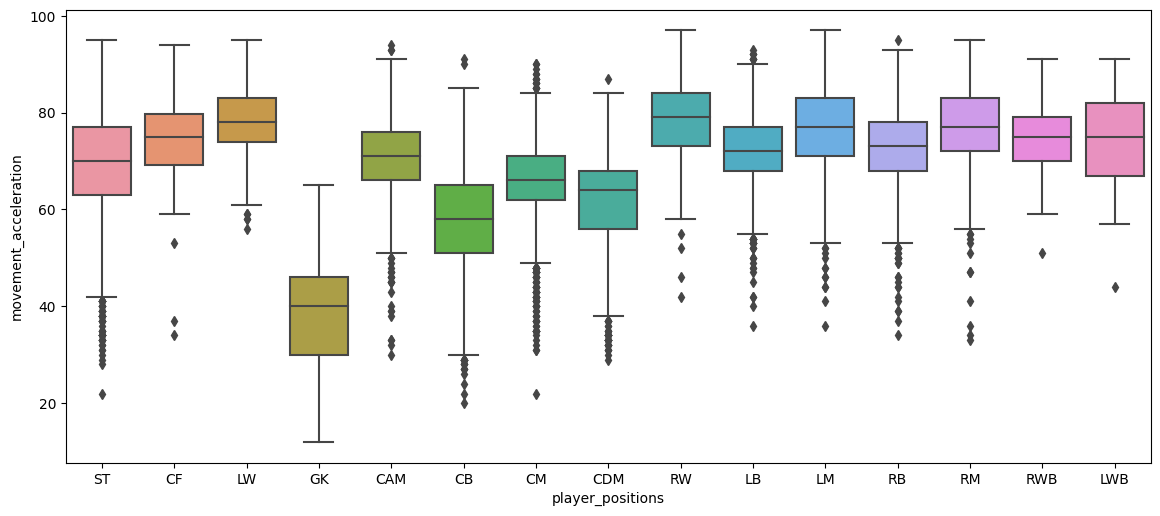

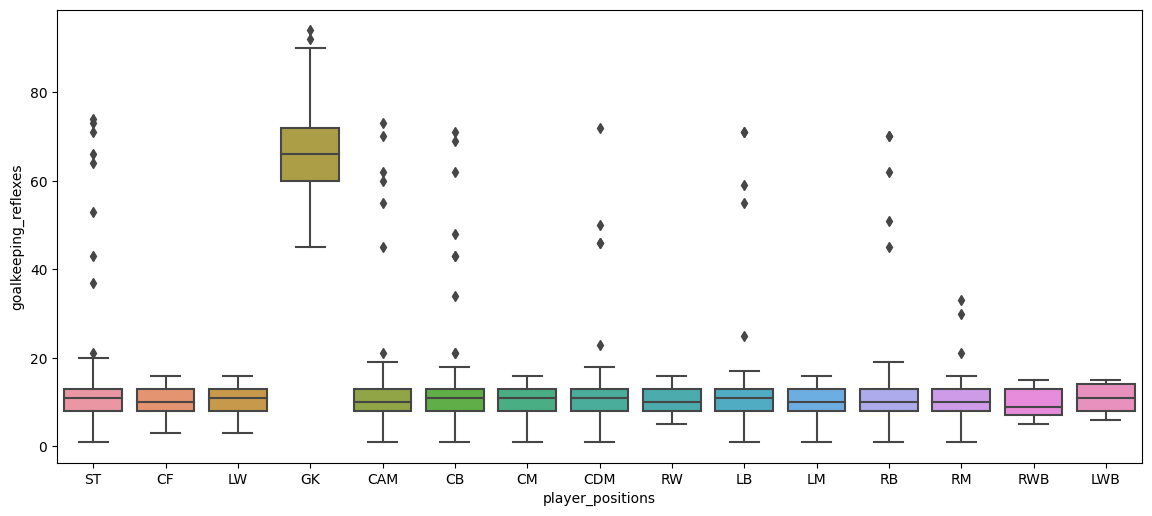

In [ ]:
#we do exploratory data analysis in python for the data collected
plot_df = fifa19.copy()

plot_df['player_positions'] = plot_df['player_positions'].str.split(',',expand=True)[0]


plt.figure(figsize=(14, 6),dpi=100)
sns.boxplot(x="player_positions", y="attacking_crossing", data = plot_df)

plt.figure(figsize=(14, 6),dpi=100)
sns.boxplot(x="player_positions", y="movement_acceleration", data = plot_df)

plt.figure(figsize=(14, 6),dpi=100)
sns.boxplot(x="player_positions", y="goalkeeping_reflexes", data = plot_df)


Based on EDA some features have more say in player postion then other like
'goalkeeping reflexes' is in direct correlation with 'GK' postion, same as 'atteck crossing' have some correlation wiht postion other then 'GK'

# Data Cleaning, Encoding, Imputing

In [ ]:
#we create a finction named data_cleaning to clean the data
def data_cleaning(df):
    df = df.drop(['potential','nation_jersey_number','team_jersey_number','preferred_foot','contract_valid_until',
                  'value_eur','wage_eur','release_clause_eur','sofifa_id','nation_position','team_position'],axis=1)
    
    df['player_positions'] = df['player_positions'].str.split(',',expand=True)[0]
    df['work_rate'] = df['work_rate'].str.split('/',expand=True)[0]

    label_encoder = LabelEncoder()
    df['player_positions'] = df['player_positions'].map(encode)
    df['work_rate'] = label_encoder.fit_transform(df['work_rate'])

    col1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram',
        'lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

    for i in col1:
        if df[i].dtype=='O':
            df[i] = df[i].str.replace('+','!')
            df[i] = df[i].str.replace('-','!')
            df[i] = df[i].str.split('!',expand=True)[0].fillna('0').astype('int64')

    numeric_columns = []
    string_columns = []

    for col in df.columns:
        if df[col].dtype != 'object':
            numeric_columns.append(col)
        else:
            string_columns.append(col)

    print(numeric_columns)
    print(string_columns)

    imputer = SimpleImputer()
    impute_arr = imputer.fit_transform(df[numeric_columns])

    return pd.DataFrame(impute_arr,columns=df[numeric_columns].columns)
    

# Clean 2019 Data

In [ ]:
#by using the function created above we will clean the data
clean_fifa19 = data_cleaning(fifa19.drop('league_rank',axis=1))
clean_fifa19.head()

['age', 'height_cm', 'weight_kg', 'overall', 'player_positions', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking

,age,height_cm,weight_kg,overall,player_positions,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,33.0,187.0,83.0,94.0,14.0,5.0,4.0,5.0,0.0,90.000000,93.000000,81.00000,89.000000,35.000000,79.00000,65.288812,62.859537,61.434697,66.050271,38.603746,62.949729,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,92.0,92.0,92.0,90.0,91.0,91.0,91.0,90.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,54.0,54.0,54.0,61.0
1,31.0,170.0,72.0,94.0,3.0,5.0,4.0,4.0,2.0,88.000000,91.000000,88.00000,96.000000,32.000000,61.00000,65.288812,62.859537,61.434697,66.050271,38.603746,62.949729,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,85.0,85.0,85.0,91.0,63.0,61.0,61.0,61.0,63.0,59.0,48.0,48.0,48.0,59.0
2,26.0,175.0,68.0,92.0,8.0,5.0,5.0,5.0,0.0,92.000000,84.000000,83.00000,95.000000,32.000000,59.00000,65.288812,62.859537,61.434697,66.050271,38.603746,62.949729,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,89.0,81.0,81.0,81.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0
3,27.0,193.0,76.0,91.0,5.0,4.0,3.0,1.0,2.0,67.754422,52.135962,56.98636,62.174141,51.631602,64.92439,90.000000,85.000000,87.000000,94.000000,58.000000,88.000000,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,33.0,33.0,33.0,37.0,38.0,38.0,38.0,37.0,43.0,43.0,43.0,40.0,45.0,45.0,45.0,40.0,36.0,41.0,41.0,41.0,36.0,35.0,34.0,34.0,34.0,35.0
4,27.0,181.0,70.0,91.0,0.0,4.0,5.0,4.0,0.0,77.000000,86.000000,92.00000,87.000000,60.000000,78.00000,65.288812,62.859537,61.434697,66.050271,38.603746,62.949729,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,83.0,83.0,83.0,87.0,87.0,87.0,87.0,87.0,89.0,89.0,89.0,88.0,88.0,88.0,88.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,67.0,67.0,67.0,73.0


# X : Predictors
# y : Response Variable

In [ ]:
#we will assign the Predictor variables and Response variables as 'X' and 'y'
X = clean_fifa19.drop('player_positions',axis=1)
y = clean_fifa19['player_positions']

In [ ]:
#we will take a look at the data 
y

0        14.0
1         3.0
2         8.0
3         5.0
4         0.0
         ... 
18080     4.0
18081    10.0
18082     4.0
18083     4.0
18084     5.0
Name: player_positions, Length: 18085, dtype: float64

# Scaling

In [ ]:
#we shall scale the data using StandardScaler() function
scaler = StandardScaler()
scale_X = scaler.fit_transform(X)

# Spliting Data in Train and Test

In [ ]:
#we perform train test split by considering 80% data for training and the random value is set as 1
X_train,X_test,y_train,y_test = train_test_split(scale_X,y,train_size=0.8,random_state=1)

# Logistic Regression

In [ ]:
#we apply Logistic Regression
log = LogisticRegression()
log.fit(X_train,y_train)
log_pred = log.predict(X_test)

# Logistic Regression Accuracy

In [ ]:
#we check how accurate the Logistic Regression is by looking at the accuracy score
accuracy_score(y_test,log_pred)

0.7141277301631186

# Cross Validation (Logistic Regression)


In [ ]:
#we do cross validation for the logistic regression model used 
log_cv = cross_validate(log,scale_X,y,scoring='accuracy',return_train_score = True)

In [ ]:
#we take a quick look at the data after cross validation is done
log_cv

{'fit_time': array([6.47879004, 7.64358282, 7.74889731, 6.95012212, 3.39809561]),
 'score_time': array([0.00319266, 0.00647163, 0.01780438, 0.0062871 , 0.00311303]),
 'test_score': array([0.70362179, 0.72795134, 0.71274537, 0.70223942, 0.68675698]),
 'train_score': array([0.7316146 , 0.73078518, 0.73596904, 0.73410285, 0.73742051])}

# Cross Validation Accuracy

In [ ]:
#we check for the accuracy after cross validation is done
np.mean(log_cv['test_score'])

0.7066629803704728

# DecisionTreeClassifier

In [ ]:
#we use DecisionTreeClassifier() 
tree = DecisionTreeClassifier()
 #we will fit the model on train data
tree.fit(X_train,y_train)
#we will predict the data on the test data
tree_pred = tree.predict(X_test)

# DecisionTreeClassifier Accuracy


In [ ]:
#we will check the accuracy for the DecisionTreeClassifier
accuracy_score(y_test,tree_pred)

0.5869505114735969

# RandomForestClassifier

In [ ]:
#we will now use RandomForestClassifier
forest = RandomForestClassifier(1000)
# we will fit the model on train data
forest.fit(X_train,y_train)
#we will predict the values on X_test
forest_pred = forest.predict(X_test)

# RandomForestClassifier Accuracy

In [ ]:
#we will now check the accuracy of RandomForestClassifier
accuracy_score(y_test,forest_pred)

0.6928393696433508

# AdaBoost

In [ ]:
#we will now use AdaBoost Classifier 
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators = 100)
#we will fit the this on trained data
adaboost.fit(X_train,y_train)
#prediction is done on the X_test values
adaboost_pred = adaboost.predict(X_test)

# AdaBoost Accuracy

In [ ]:
#we will check the accuracy of AdaBoost
accuracy_score(y_test,adaboost_pred)

0.4564556262095659

# FIFA 2020 Data

In [ ]:
#we will read the data from 'players_20.csv' as a pandas dataframe
fifa20 = pd.read_csv(r'/content/drive/MyDrive/players_20.csv')
fifa20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


# Data Manipulation using above Data clean finction

In [ ]:
#we will clean the data using the function named data_cleaning created above
clean_fifa20 = data_cleaning(fifa20)
clean_fifa20.head()

['age', 'height_cm', 'weight_kg', 'overall', 'player_positions', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking

,age,height_cm,weight_kg,overall,player_positions,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32.0,170.0,72.0,94.0,12.0,5.0,4.0,4.0,2.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,34.0,187.0,83.0,93.0,14.0,5.0,4.0,5.0,0.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,27.0,175.0,68.0,92.0,8.0,5.0,5.0,5.0,0.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0
3,26.0,188.0,87.0,91.0,5.0,3.0,3.0,1.0,2.0,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,175.0,74.0,91.0,8.0,4.0,4.0,4.0,0.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,81.0,84.0,61.0,89.0,83.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,84.0,63.0,80.0,54.0,41.0,87.0,89.0,88.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,83.0,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,83.0,83.0,83.0,89.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0


In [ ]:
#we will remove the column player_postion from the data frame
X = clean_fifa20.drop('player_positions',axis=1)

In [ ]:
#we will take a look at the first three rows 
X.head(3)

,age,height_cm,weight_kg,overall,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32.0,170.0,72.0,94.0,5.0,4.0,4.0,2.0,87.0,92.0,92.0,96.0,39.0,66.0,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,34.0,187.0,83.0,93.0,5.0,4.0,5.0,0.0,90.0,93.0,82.0,89.0,35.0,78.0,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,27.0,175.0,68.0,92.0,5.0,5.0,5.0,0.0,91.0,85.0,87.0,95.0,32.0,58.0,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0


In [ ]:
#we will standardize the data using StandardScaler()
scaler = StandardScaler()
scale_X = scaler.fit_transform(X)

# Here we use LogisticRegression model to predict.

In [ ]:
#we can predict the data using logistic regression
y_pred = log.predict(scale_X)

# Accuracy on FIFA 2020 Data 

In [ ]:
#we will check for the accuracy score on the predicted values
accuracy_score(clean_fifa20['player_positions'],y_pred)

0.6983805668016194

# Data Processing 

In [ ]:
#we will perform Data Processing now
rate = []
for i in range(y_pred.shape[0]):
  if(y_pred[i] == clean_fifa20['player_positions'][i]):
    rate.append(1)
  else:
    rate.append(0)

In [ ]:
pos = []
for i in range(y_pred.shape[0]):
  pos.append(decode[y_pred[i]])

In [ ]:
act = clean_fifa20['player_positions'].map(decode)

In [ ]:
s = [1 for i in range(X.shape[0])]

In [ ]:
pred_df = pd.DataFrame({'Name':fifa20['short_name'],'Club':fifa20['club'],'player_positions':fifa20['player_positions'],'Actual_Postion':act,'Predicted_Postion':pos,'Correct':rate,'s':s})
pred_df.head()

,Name,Club,player_positions,Actual_Postion,Predicted_Postion,Correct,s
0,L. Messi,FC Barcelona,"RW, CF, ST",RW,CF,0,1
1,Cristiano Ronaldo,Juventus,"ST, LW",ST,ST,1,1
2,Neymar Jr,Paris Saint-Germain,"LW, CAM",LW,LM,0,1
3,J. Oblak,Atlético Madrid,GK,GK,GK,1,1
4,E. Hazard,Real Madrid,"LW, CF",LW,CAM,0,1


# Result for Data in FIFA 20 
## Players from the following Clubs 

1) FC Barcelona

2) FC Bayern München

3) Real Madrid 

4) Paris Saint-Germain

5) Juventus

6) Atlético Madrid

7) Manchester City

8) Liverpool 

9) Manchester United

# By Club

In [ ]:
club_lst = ['FC Barcelona','FC Bayern München','Real Madrid','Paris Saint-Germain','Juventus','Atlético Madrid','Manchester City','Liverpool' ,'Manchester United']


In [ ]:
pred_df[pred_df['Club'].isin(club_lst)].head()

,Name,Club,player_positions,Actual_Postion,Predicted_Postion,Correct,s
0,L. Messi,FC Barcelona,"RW, CF, ST",RW,CF,0,1
1,Cristiano Ronaldo,Juventus,"ST, LW",ST,ST,1,1
2,Neymar Jr,Paris Saint-Germain,"LW, CAM",LW,LM,0,1
3,J. Oblak,Atlético Madrid,GK,GK,GK,1,1
4,E. Hazard,Real Madrid,"LW, CF",LW,CAM,0,1


In [ ]:
byclub = pred_df.groupby(by='Club').sum()['Correct']*100 / pred_df.groupby(by='Club').sum()['s']

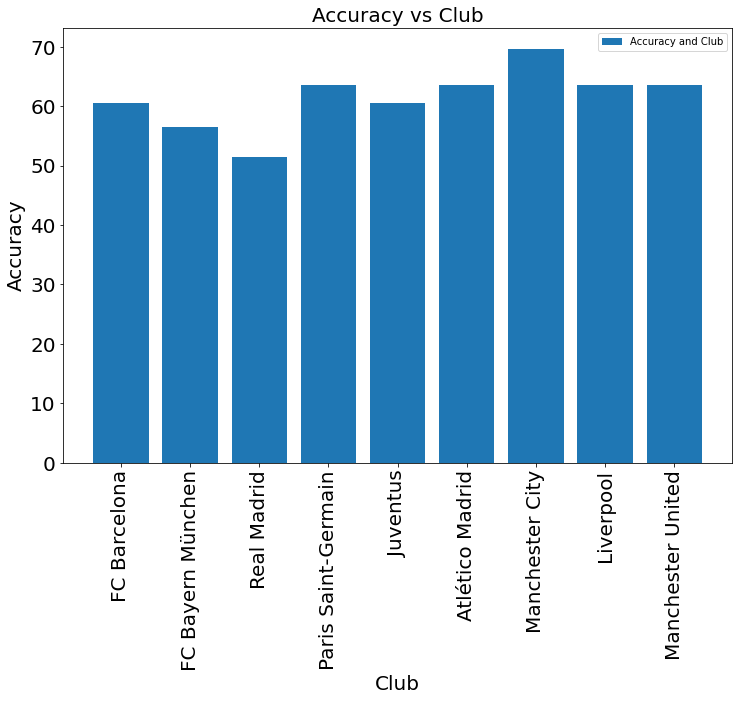

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(club_lst,byclub[club_lst].values,label='Accuracy vs Club')
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('Club',size=20)
plt.ylabel('Accuracy',size=20)
plt.title('Accuracy vs Club',size=20)
plt.legend()
plt.show()

# By Postion

In [ ]:
bypos = pred_df.groupby(by='Actual_Postion').sum()['Correct']*100 / pred_df.groupby(by='Actual_Postion').sum()['s']
bypos = bypos.sort_values(ascending=False)[:10]

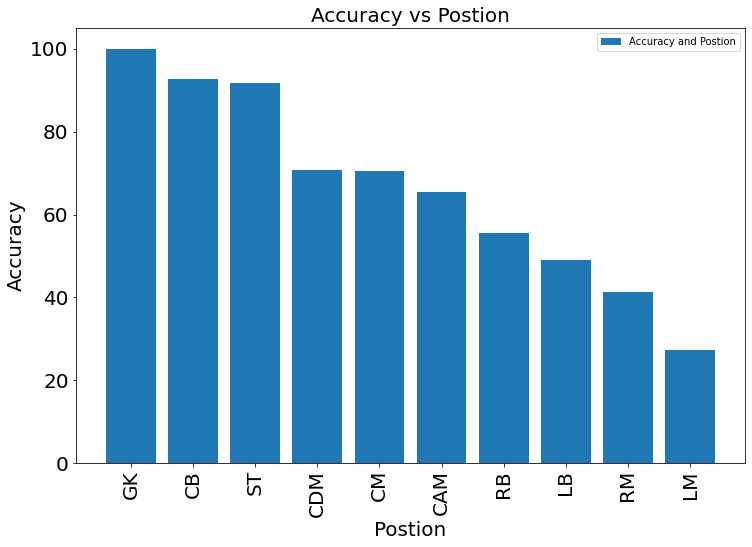

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(bypos.index,bypos.values,label='Accuracy vs Postion')
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('Postion',size=20)
plt.ylabel('Accuracy',size=20)
plt.title('Accuracy vs Postion',size=20)
plt.legend()
plt.show()

#Accuracy:

#Test Data (FIFA 2019) : 71.41%

#Test Data (FIFA 2020) : 69.83%

In [ ]:
pred_df[['short_name','Actual_Postion','Predicted_Postion']].to_csv('Part_B_Out.csv')